In [35]:
import pandas_datareader.data as web
from datetime import datetime
import pandas as pd

start = datetime(2007,7,1)
end = datetime(2017,7,1)

f = web.DataReader('FX.F', 'stooq',start,end)#,start=start,end=end)
f

fx = web.DataReader('FX.F', 'stooq')
fx
#frames = [f,fx]
#result = pd.concat(frames)
#result


,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2021-05-21,4005.0,4027.0,3991.0,4017.0,901971.0,3378091.0
2021-05-20,3937.0,4003.0,3927.0,3985.0,910877.0,3318158.0
2021-05-19,3972.0,3983.0,3882.0,3930.0,1320173.0,3395125.0
2021-05-18,4013.0,4034.0,3978.0,4005.0,722887.0,3237598.0
2021-05-17,4020.0,4025.0,3984.0,4000.0,635362.0,3229697.0
...,...,...,...,...,...,...
2016-05-30,3076.0,3086.0,3063.0,3084.0,NaN,NaN
2016-05-27,3061.0,3073.0,3050.0,3071.0,NaN,NaN
2016-05-26,3038.0,3064.0,3037.0,3058.0,NaN,NaN


In [43]:
gdp = web.DataReader('CLVMNACSCAB1GQEU28', 'fred',start,end)
hicp = web.DataReader('CP0000EZ19M086NEST','fred',start,end)
#HICP <- Harmonized Index ofConsumer Prices: All Items for Euro area (19 countries)
manu = web.DataReader('PRMNTO01EUQ661S','fred',start,end)
gas = web.DataReader('PNGASEUUSDM','fred',start,end)
gas


,PNGASEUUSDM
DATE,
2007-07-01,7.790000
2007-08-01,7.790000
2007-09-01,7.790000
2007-10-01,8.560000
2007-11-01,8.560000
...,...
2017-03-01,4.945020
2017-04-01,5.035127
2017-05-01,5.067728


In [64]:
from pandas_datareader import data

# Only get the adjusted close.
df = data.DataReader("^STOXX50E", 
                       start=start, 
                       end=end, 
                       data_source='yahoo')
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2007-07-02,4479.810059,4450.290039,4471.799805,4470.259766,0.0,4470.259766
2007-07-03,4522.479980,4483.379883,4483.379883,4513.009766,0.0,4513.009766
2007-07-04,4530.200195,4515.250000,4519.419922,4524.240234,0.0,4524.240234
2007-07-05,4537.930176,4486.720215,4533.000000,4491.870117,0.0,4491.870117
2007-07-06,4524.450195,4486.500000,4492.089844,4524.450195,0.0,4524.450195
...,...,...,...,...,...,...
2017-06-26,3581.429932,3554.280029,3554.280029,3561.760010,44295400.0,3561.760010
2017-06-27,3560.610107,3529.979980,3557.629883,3538.320068,47090100.0,3538.320068
2017-06-28,3543.699951,3498.479980,3530.669922,3535.699951,55551100.0,3535.699951


In [65]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

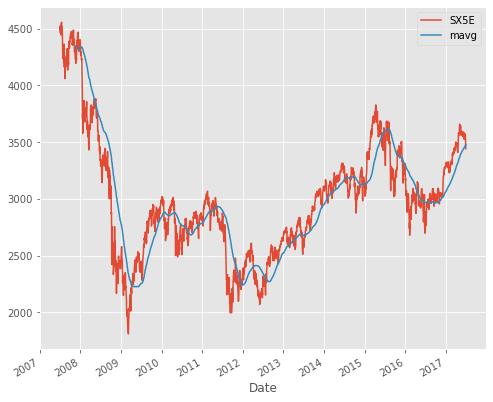

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='SX5E')
mavg.plot(label='mavg')
plt.legend()

<AxesSubplot:xlabel='Date'>

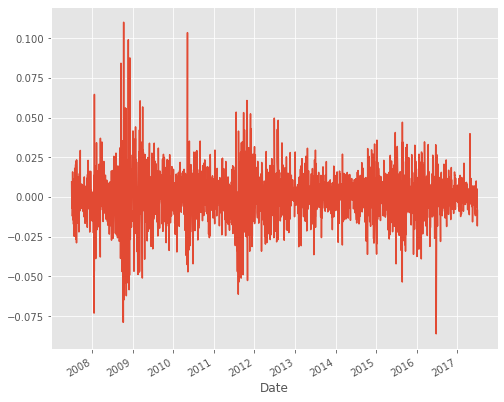

In [67]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

In [71]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2007-07-02,4470.259766,0.0,0.660365,-0.034439
2007-07-03,4513.009766,0.0,0.866386,0.660883
2007-07-04,4524.240234,0.0,0.330447,0.106658
2007-07-05,4491.870117,0.0,1.140059,-0.907344
2007-07-06,4524.450195,0.0,0.838780,0.720385
...,...,...,...,...
2017-06-26,3561.760010,44295400.0,0.762261,0.210450
2017-06-27,3538.320068,47090100.0,0.865669,-0.542772
2017-06-28,3535.699951,55551100.0,1.278954,0.142467


In [ ]:
pandas_datareader.mstar.daily.MorningstarDailyReader()

In [80]:
y

array([4364.22021484, 4275.18017578, 4161.29003906, ..., 3535.69995117,
       3471.33007812, 3441.87988281])